# CNN for image classification using Keras
---
### This is a simple implementation for MNIST data base numbers classification using Keras with Tensorflow backend.
---
#### Two different architecture for the network are introduced,without dropout and with dropout.

Network architecture without dropout has the following layers:
* Input layer: gray scale image with dimension of 28*28
* convolution layer: kernel with size 5x5x7
* convolution layer: kernel with size 5x5x7
* maxpolling (down sampling layer) 
* fully connected layer: 512 neurons
* fully connected layer: 512 neurons
* ormalization layer:softmax activation
---
Network architecture with dropout has the following layers:
* Input layer: gray scale image with dimension of 28*28
* convolution layer: kernel with size 5x5x7
* convolution layer: kernel with size 5x5x7
* maxpolling (down sampling layer) 
* fully connected layer: 512 neurons
* dropout layer
* fully connected layer: 512 neurons
* dropout layer
* ormalization layer:softmax activation

### Importing Library to be used

In [45]:
from keras.layers import Dense,activations,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential

from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data and prepare it for training

In [80]:
# Data load
(train_imgs, train_labels),(test_imgs, test_labels)=mnist.load_data()
# Data Checkout
print ("The number of training examples is: ", train_imgs.shape[0])
print ("The number of test examples is: ", test_imgs.shape[0])
print ("The size of every img is: ", train_imgs.shape[1:])
num_classes=len(np.unique(train_labels))
print ("The number of classes is: ", num_classes)

The number of training examples is:  60000
The number of test examples is:  10000
The size of every img is:  (28, 28)
The number of classes is:  10


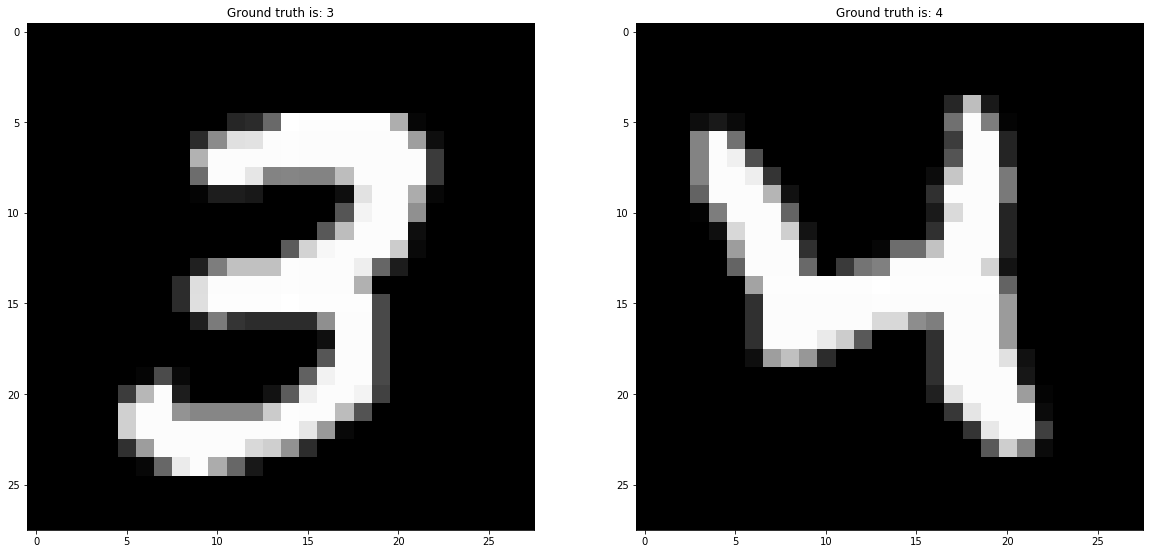

In [6]:
# printing out some samples
figure,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))

ax1.imshow(train_imgs[7,:,:],cmap='gray')
ax1.set_title("Ground truth is: {}".format(train_labels[7]))

ax2.imshow(train_imgs[20,:,:],cmap='gray')
ax2.set_title("Ground truth is: {}".format(train_labels[20]))

In [81]:
# Normalizing the input images by dividing by 255 to make sure the the values are between 0 and 1
train_imgs=(train_imgs)/255
test_imgs=(test_imgs)/255

train_imgs=train_imgs.reshape([train_imgs.shape[0],1,train_imgs.shape[1],train_imgs.shape[2]])
test_imgs=test_imgs.reshape([test_imgs.shape[0],1,test_imgs.shape[1],test_imgs.shape[2]])
#Converting labels to one-hot encoding format 
from keras.utils.np_utils import to_categorical
train_labels_one_hot=to_categorical(train_labels,10)
test_labels_one_hot=to_categorical(test_labels,10)

### Create a network without dropout

In [61]:
model=Sequential()
model.add(Conv2D(64,3,3,activation='relu',input_shape=(1,28,28),border_mode='same'))
model.add(Conv2D(32,3,3,activation='relu',border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2),dim_ordering="th"))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

### Configure the learning process (the optimizer and the loss function)

In [62]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

### Model training

In [63]:
history=model.fit(train_imgs,train_labels_one_hot,batch_size=256,nb_epoch=20,verbose=1, 
                   validation_data=(test_imgs, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s - loss: 1.7410 - acc: 0.3784 - val_loss: 1.2314 - val_acc: 0.5660
Epoch 2/20
60000/60000 [==============================] - 5s - loss: 1.2137 - acc: 0.5721 - val_loss: 1.5541 - val_acc: 0.4192
Epoch 3/20
60000/60000 [==============================] - 5s - loss: 1.0059 - acc: 0.6554 - val_loss: 0.8574 - val_acc: 0.7001
Epoch 4/20
60000/60000 [==============================] - 5s - loss: 0.7999 - acc: 0.7287 - val_loss: 0.7185 - val_acc: 0.7607
Epoch 5/20
60000/60000 [==============================] - 5s - loss: 0.6472 - acc: 0.7852 - val_loss: 0.8215 - val_acc: 0.7156
Epoch 6/20
60000/60000 [==============================] - 5s - loss: 0.5315 - acc: 0.8240 - val_loss: 0.5057 - val_acc: 0.8296
Epoch 7/20
60000/60000 [==============================] - 5s - loss: 0.4453 - acc: 0.8533 - val_loss: 0.5944 - val_acc: 0.8056
Epoch 8/20
60000/60000 [==============================] - 6s 

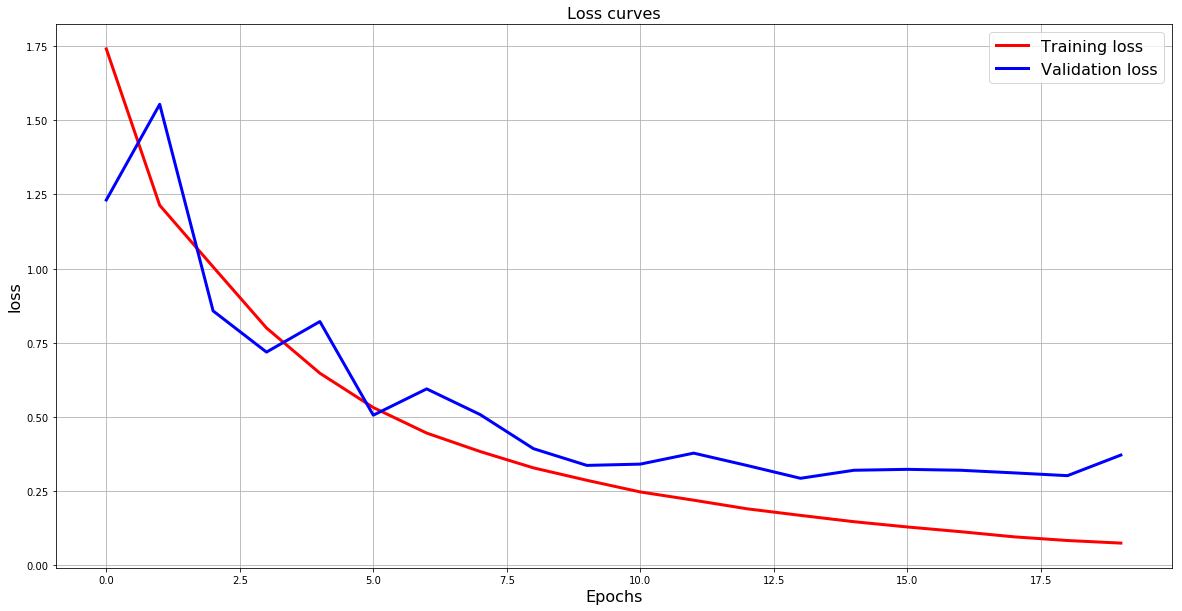

In [65]:
plt.figure(figsize=[20,10])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves',fontsize=16)
plt.grid()

### Accuracy curve

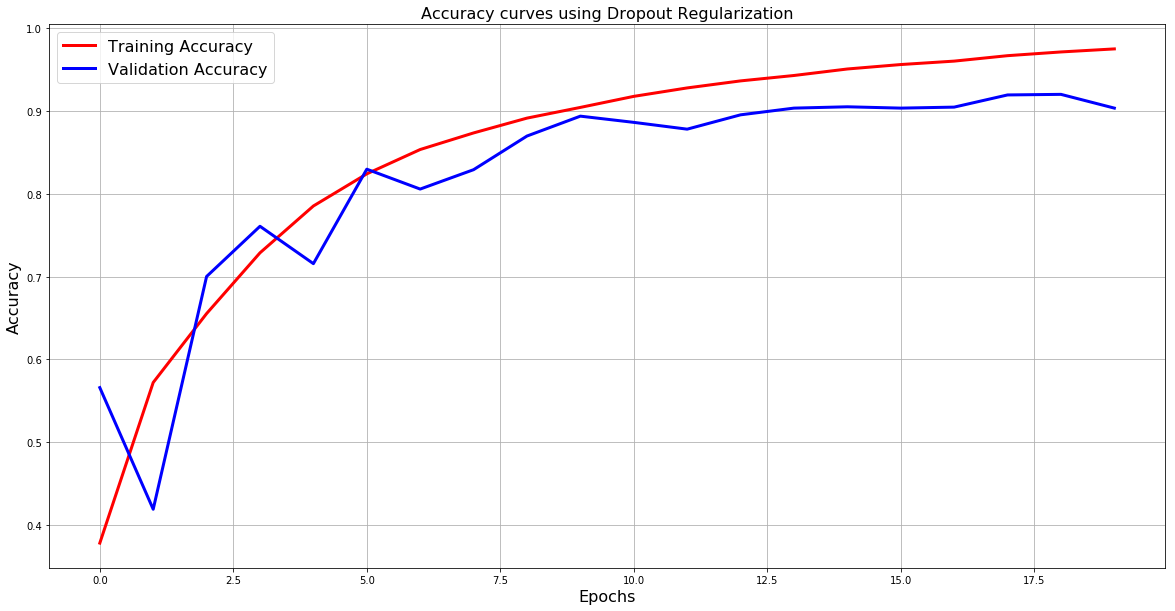

In [66]:
plt.figure(figsize=[20,10])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()

### Create a network using dropout layer

In [94]:
model=Sequential()
model.add(Conv2D(64,3,3,activation='relu',input_shape=(1,28,28),border_mode='same'))
model.add(Conv2D(32,3,3,activation='relu',border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2),dim_ordering="th"))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

### Configure the learning process (the optimizer and the loss function)


In [95]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [96]:
history=model.fit(train_imgs,train_labels_one_hot,batch_size=256,nb_epoch=20,verbose=1, 
                   validation_data=(test_imgs, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s - loss: 0.5320 - acc: 0.8297 - val_loss: 0.1666 - val_acc: 0.9500
Epoch 2/20
60000/60000 [==============================] - 6s - loss: 0.1871 - acc: 0.9450 - val_loss: 0.1000 - val_acc: 0.9667
Epoch 3/20
60000/60000 [==============================] - 6s - loss: 0.1281 - acc: 0.9625 - val_loss: 0.0800 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 6s - loss: 0.1050 - acc: 0.9700 - val_loss: 0.0779 - val_acc: 0.9752
Epoch 5/20
60000/60000 [==============================] - 6s - loss: 0.0895 - acc: 0.9732 - val_loss: 0.0550 - val_acc: 0.9825
Epoch 6/20
60000/60000 [==============================] - 6s - loss: 0.0808 - acc: 0.9768 - val_loss: 0.0521 - val_acc: 0.9838
Epoch 7/20
60000/60000 [==============================] - 7s - loss: 0.0727 - acc: 0.9796 - val_loss: 0.0476 - val_acc: 0.9848
Epoch 8/20
60000/60000 [==============================] - 8s 

### Loss curve

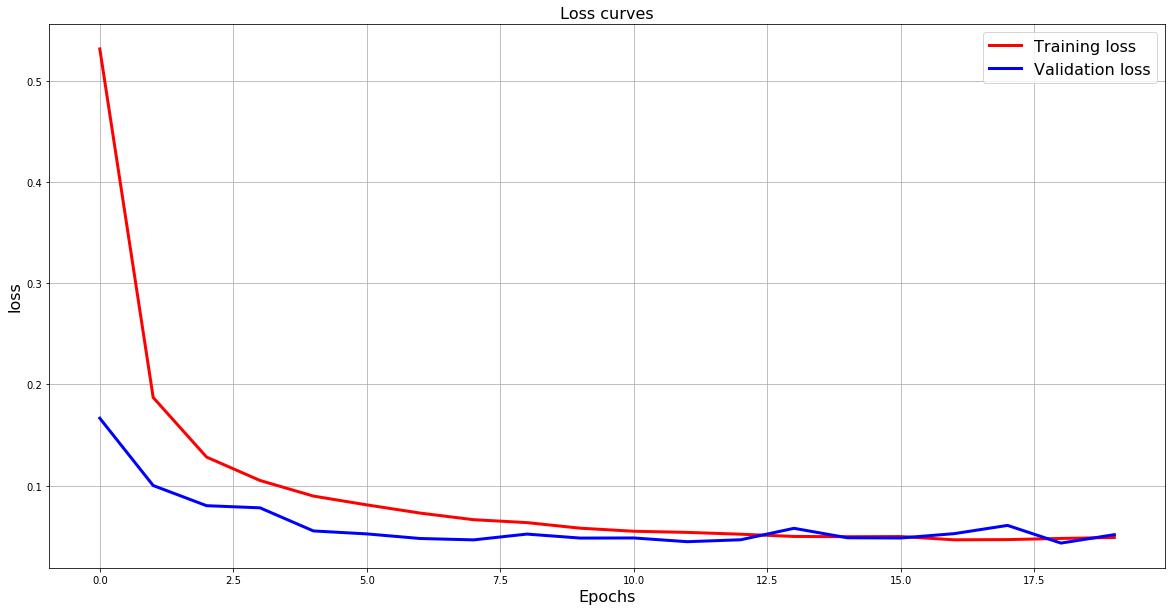

In [97]:
plt.figure(figsize=[20,10])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('Loss curves',fontsize=16)
plt.grid()

### Accuracy curve

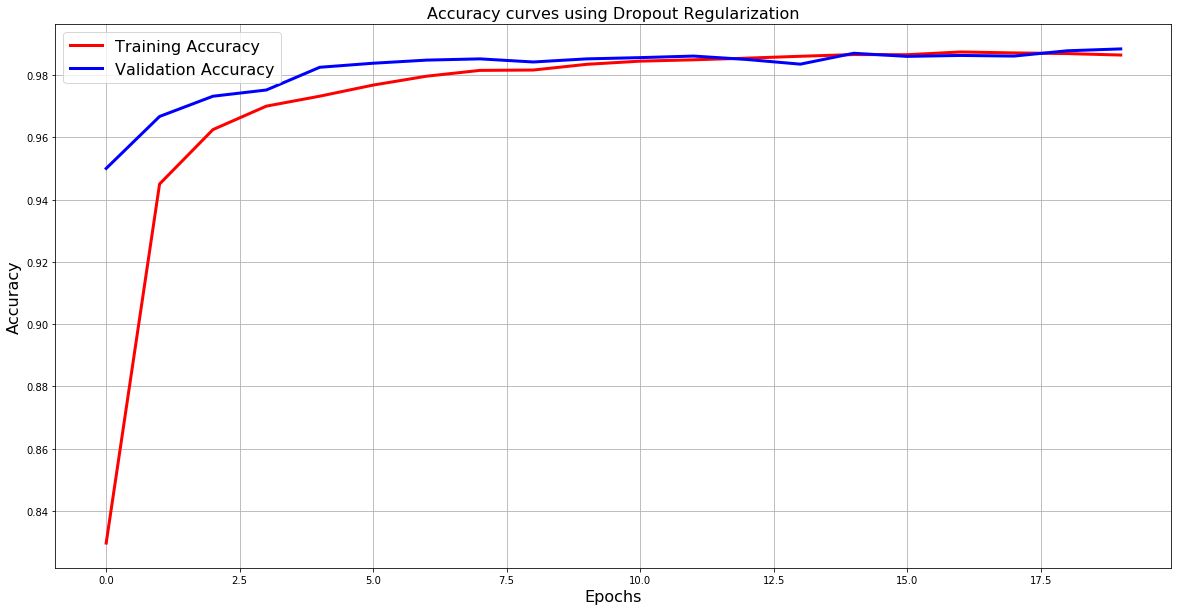

In [98]:
plt.figure(figsize=[20,10])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy curves using Dropout Regularization',fontsize=16)
plt.grid()